In [57]:
!pip install mtcnn

In [87]:
import cv2
from mtcnn import MTCNN
import os
import shutil
import matplotlib.pyplot as plt

In [69]:
def classify_frames(video_path):
    # Capture the video
    vidcap = cv2.VideoCapture(video_path)
    if not vidcap.isOpened():
        print(f"Failed to open video file: {video_path}")
        return None

    total_frames = vidcap.get(cv2.CAP_PROP_FRAME_COUNT)
    print(f"Total frames in video: {total_frames}")

    # Check if the video has frames
    if total_frames == 0:
        print("The video has no frames.")
        return None

    # Calculate indices for five evenly spaced frames
    frame_indices = [int(total_frames * i / 4) for i in range(5)]
    frame_indices[-1] = min(frame_indices[-1], total_frames - 1)  # Ensure last index is within range
    print(f"Frame indices to analyze: {frame_indices}")


    # Initialize MTCNN detector
    detector = MTCNN()

    # Variables to store the highest confidence and its corresponding total area
    highest_overall_confidence = 0
    total_area_highest_confidence_frame = 0

    for index in frame_indices:
        # Set the frame position
        vidcap.set(cv2.CAP_PROP_POS_FRAMES, index)
        success, frame = vidcap.read()

        if not success:
            print(f"Could not read the frame at index {index}")
            continue

        # Detect faces in the image
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        faces = detector.detect_faces(frame_rgb)

        if faces:
            # Calculate the total area of faces in the current frame
            total_area_current_frame = sum([face['box'][2] * face['box'][3] for face in faces])

            # Find the highest confidence in the current frame
            highest_confidence_current_frame = max([face['confidence'] for face in faces])

            # Update if the current frame has a higher confidence than the overall
            if highest_confidence_current_frame > highest_overall_confidence:
                highest_overall_confidence = highest_confidence_current_frame
                total_area_highest_confidence_frame = total_area_current_frame

    return highest_overall_confidence, total_area_highest_confidence_frame

In [70]:
# Negative example
confidence, total_area = classify_frames("AlgonautsVideos268_All_30fpsmax/0001_0-0-1-6-7-2-8-0-17500167280.mp4")
print(f"Highest confidence score across all frames: {confidence:.2f}%")
print(f"Total area of faces in the frame with highest confidence: {total_area} pixels")

Total frames in video: 90.0
Frame indices to analyze: [0, 22, 45, 67, 89.0]
1/1 [==============================] - 0s 40ms/step
Highest confidence score across all frames: 0.00%
Total area of faces in the frame with highest confidence: 0 pixels


In [72]:
video_paths = ["AlgonautsVideos268_All_30fpsmax/0001_0-0-1-6-7-2-8-0-17500167280.mp4", "AlgonautsVideos268_All_30fpsmax/0002_0-0-4-3146384004.mp4", "AlgonautsVideos268_All_30fpsmax/0003_0-0-8-1-2-4-0-0-3500812400.mp4"]

for video_path in video_paths:
    confidence, total_area = classify_frames(video_path)
    print(f"Highest confidence score across all frames: {confidence:.2f}%")
    print(f"Total area of faces in the frame with highest confidence: {total_area} pixels")

Total frames in video: 90.0
Frame indices to analyze: [0, 22, 45, 67, 89.0]
1/1 [==============================] - 0s 24ms/step
Highest confidence score across all frames: 0.00%
Total area of faces in the frame with highest confidence: 0 pixels
Total frames in video: 91.0
Frame indices to analyze: [0, 22, 45, 68, 90.0]
1/1 [==============================] - 0s 29ms/step
Highest confidence score across all frames: 0.96%
Total area of faces in the frame with highest confidence: 456 pixels
Total frames in video: 90.0
Frame indices to analyze: [0, 22, 45, 67, 89.0]
1/1 [==============================] - 0s 44ms/step
Highest confidence score across all frames: 0.90%
Total area of faces in the frame with highest confidence: 837 pixels


In [73]:
def process_batch(video_files, folder_path, faces_folder, other_folder):
    for video_file in video_files:
        video_path = os.path.join(folder_path, video_file)
        confidence, total_area = classify_frames(video_path)

        # Generate new file name with confidence and area postfix
        new_file_name = f"{os.path.splitext(video_file)[0]}_confidence_{confidence:.2f}_total_area_{total_area}.mp4"

        # Determine the destination folder
        if confidence > 0:
            destination_folder = faces_folder
        else:
            destination_folder = other_folder

        # Copy the file to the new destination with the new name
        shutil.copy(video_path, os.path.join(destination_folder, new_file_name))

def classify_faces(folder_path):
    # Ensure output folders exist
    faces_folder = os.path.join(folder_path, 'faces')
    other_folder = os.path.join(folder_path, 'other')
    os.makedirs(faces_folder, exist_ok=True)
    os.makedirs(other_folder, exist_ok=True)

    # List all video files in the specified folder
    video_files = [file for file in os.listdir(folder_path) if file.endswith(('.mp4', '.avi'))]

    # Process videos in batches of 25
    batch_size = 25
    for i in range(0, len(video_files), batch_size):
        current_batch = video_files[i:i+batch_size]
        process_batch(current_batch, folder_path, faces_folder, other_folder)
        

In [ ]:
classify_faces("AlgonautsVideos268_All_30fpsmax")

Total frames in video: 90.0
Frame indices to analyze: [0, 22, 45, 67, 89.0]
1/1 [==============================] - 0s 28ms/step
Total frames in video: 91.0
Frame indices to analyze: [0, 22, 45, 68, 90.0]
1/1 [==============================] - 0s 50ms/step
Total frames in video: 90.0
Frame indices to analyze: [0, 22, 45, 67, 89.0]
1/1 [==============================] - 0s 32ms/step
Total frames in video: 90.0
Frame indices to analyze: [0, 22, 45, 67, 89.0]
1/1 [==============================] - 0s 36ms/step
Total frames in video: 90.0
Frame indices to analyze: [0, 22, 45, 67, 89.0]
1/1 [==============================] - 0s 48ms/step
Total frames in video: 90.0
Frame indices to analyze: [0, 22, 45, 67, 89.0]
1/1 [==============================] - 0s 40ms/step
Total frames in video: 90.0
Frame indices to analyze: [0, 22, 45, 67, 89.0]
1/1 [==============================] - 0s 30ms/step
Total frames in video: 72.0
Frame indices to analyze: [0, 18, 36, 54, 71.0]
1/1 [=======================

In [76]:
def count_files(directory):
    return len([name for name in os.listdir(directory) if os.path.isfile(os.path.join(directory, name))])

faces_folder = 'AlgonautsVideos268_All_30fpsmax/faces'  # Replace with the actual path
other_folder = 'AlgonautsVideos268_All_30fpsmax/other'  # Replace with the actual path

faces_count = count_files(faces_folder)
other_count = count_files(other_folder)

print(f"Number of files in 'faces' folder: {faces_count}")
print(f"Number of files in 'other' folder: {other_count}")


Number of files in 'faces' folder: 421
Number of files in 'other' folder: 681


In [77]:
421 +681

1102

In [78]:
421/1102

0.382032667876588

In [79]:
681/1102

0.6179673321234119

In [84]:
import os
import pandas as pd
import re


def build_video_overview_df(base_directory):
    # Pattern to extract information from filename
    pattern = r'^(\d+)_\d+-\d+-\d+-\d+-\d+-\d+-\d+-\d+-\d+_confidence_([\d.]+)_total_area_([\d.]+)\.mp4$'

    # Lists to store data
    video_ids, confidences, areas, categories = [], [], [], []

    # Directories
    folders = ['faces', 'other']

    # Iterate over both folders
    for folder in folders:
        directory = os.path.join(base_directory, folder)
        for filename in os.listdir(directory):
            if filename.endswith('.mp4'):
                match = re.match(pattern, filename)
                if match:
                    video_id, confidence, area = match.groups()
                    video_ids.append(video_id)
                    confidences.append(float(confidence))
                    areas.append(int(area))
                    categories.append(folder)

    # Create DataFrame
    df = pd.DataFrame({
        'Video_ID': video_ids, 
        'Confidence': confidences, 
        'Area': areas, 
        'Category': categories
    })
    return df

# Example usage
base_directory = 'AlgonautsVideos268_All_30fpsmax'  # Replace with your base directory path
video_overview_df = build_video_overview_df(base_directory)
video_overview_df = video_overview_df.sort_values(by='Video_ID').reset_index(drop=True)

print(video_overview_df)

    Video_ID  Confidence  Area Category
0       0001        0.00     0    other
1       0003        0.90   837    faces
2       0004        0.99   480    faces
3       0005        1.00   896    faces
4       0006        0.90  4074    faces
..       ...         ...   ...      ...
107     1009        0.88   504    faces
108     1010        0.00     0    other
109     1011        1.00  1171    faces
110     1012        0.00     0    other
111     1013        0.00     0    other

[112 rows x 4 columns]


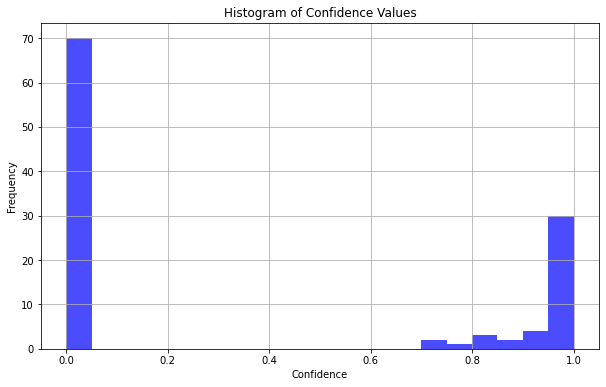

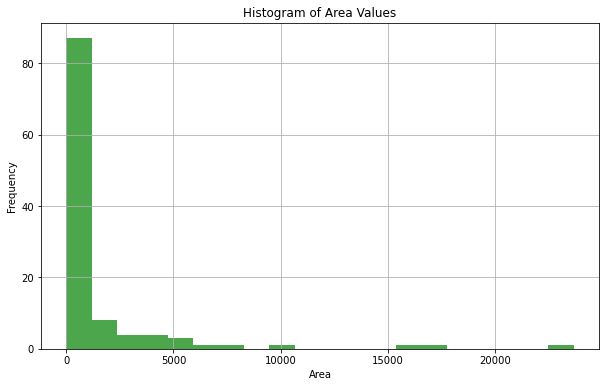

In [88]:
# Histogram for Confidence Values
plt.figure(figsize=(10, 6))
plt.hist(video_overview_df['Confidence'], bins=20, color='blue', alpha=0.7)
plt.title('Histogram of Confidence Values')
plt.xlabel('Confidence')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Histogram for Area Values
plt.figure(figsize=(10, 6))
plt.hist(video_overview_df['Area'], bins=20, color='green', alpha=0.7)
plt.title('Histogram of Area Values')
plt.xlabel('Area')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()